In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

#import model evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

from sklearn.preprocessing import OneHotEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


# Introduction
"The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland."
<br><br>
**Aim:**
<br> In this notebook, various machine learning algorithms will be applied and to classify the sex of possums based on various body size measurements and location data

# Loading data and initial exploration

In [2]:
#load data from csv file
data = pd.read_csv('../input/openintro-possum/possum.csv')

In [3]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
# drop redundant index
data.drop('case', axis = 1, inplace = True)

In [5]:
data.shape

(104, 13)

In [6]:
data.dtypes

site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.7+ KB


In [8]:
#checking for null values
data.isna().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

There are 3 null values in the data which must be taken care of before modeling

In [9]:
data.nunique(axis=0)

site         7
Pop          2
sex          2
age          9
hdlngth     71
skullw      64
totlngth    34
taill       19
footlgth    75
earconch    69
eye         35
chest       19
belly       24
dtype: int64

In [10]:
#checking for duplicated columns
data.duplicated().sum()

0

There are no duplicate columns in the data :)

In [11]:
#impute null values 
data.age = data.age.fillna(data.age.median())
data.footlgth = data.footlgth.fillna(data.footlgth.median())

In [12]:
#check for remaining nulls
data.isna().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

There are no remaining null values and the data has been successfully cleaned.

# Exploratory Data Analysis
Let's start simple by making histograms for all of the data

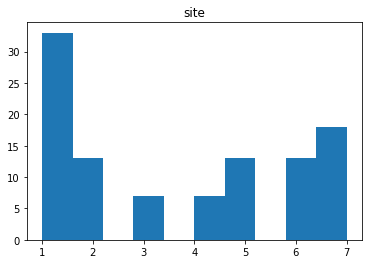

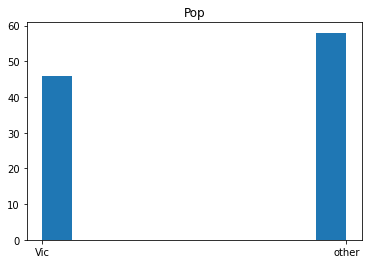

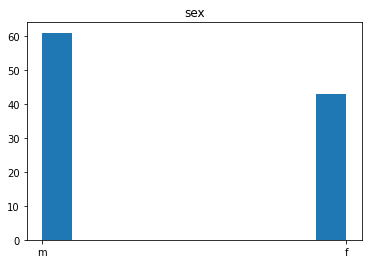

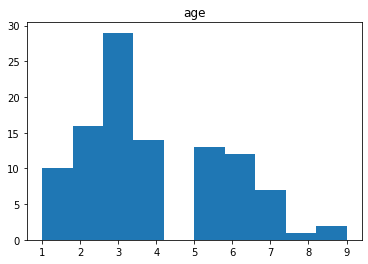

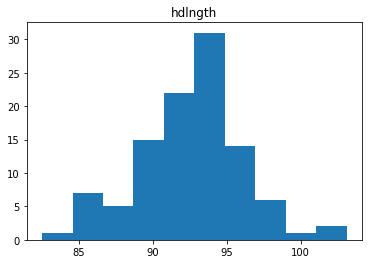

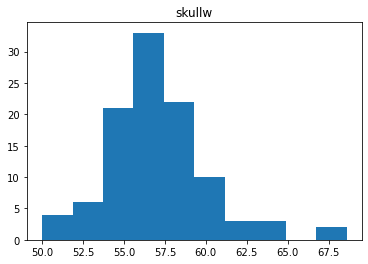

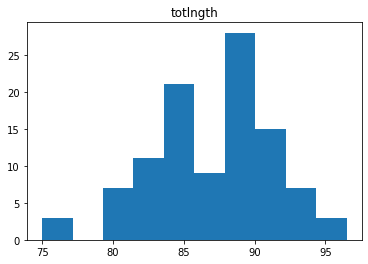

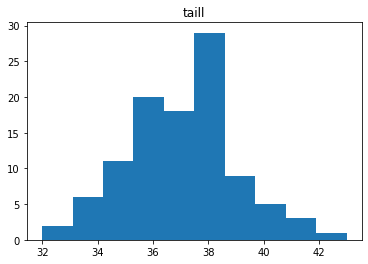

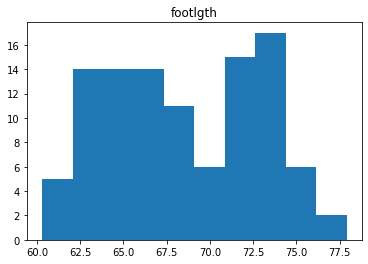

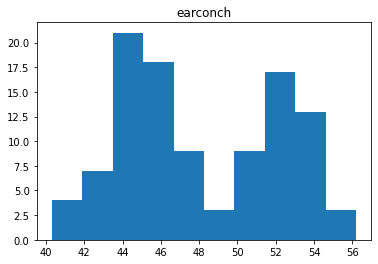

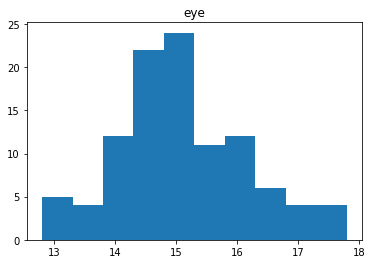

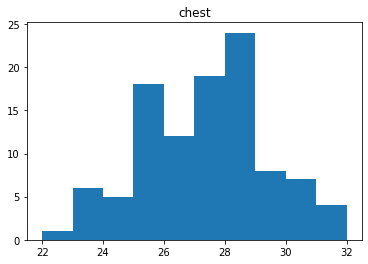

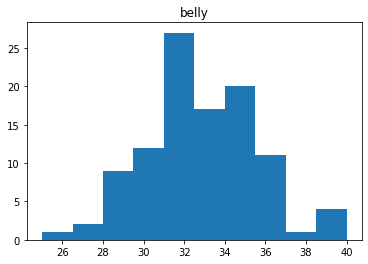

In [13]:
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

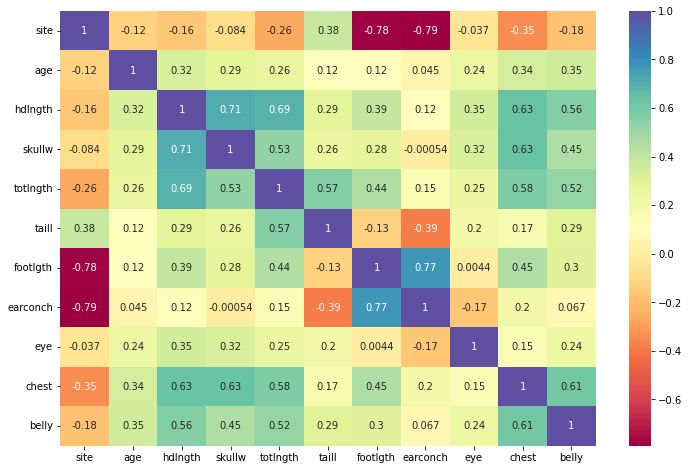

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True, cmap = 'Spectral')

Now let's look at how the data differs between sexes:

In [15]:
#select data with 'float' type for graphing
flt=data.select_dtypes(include='float')

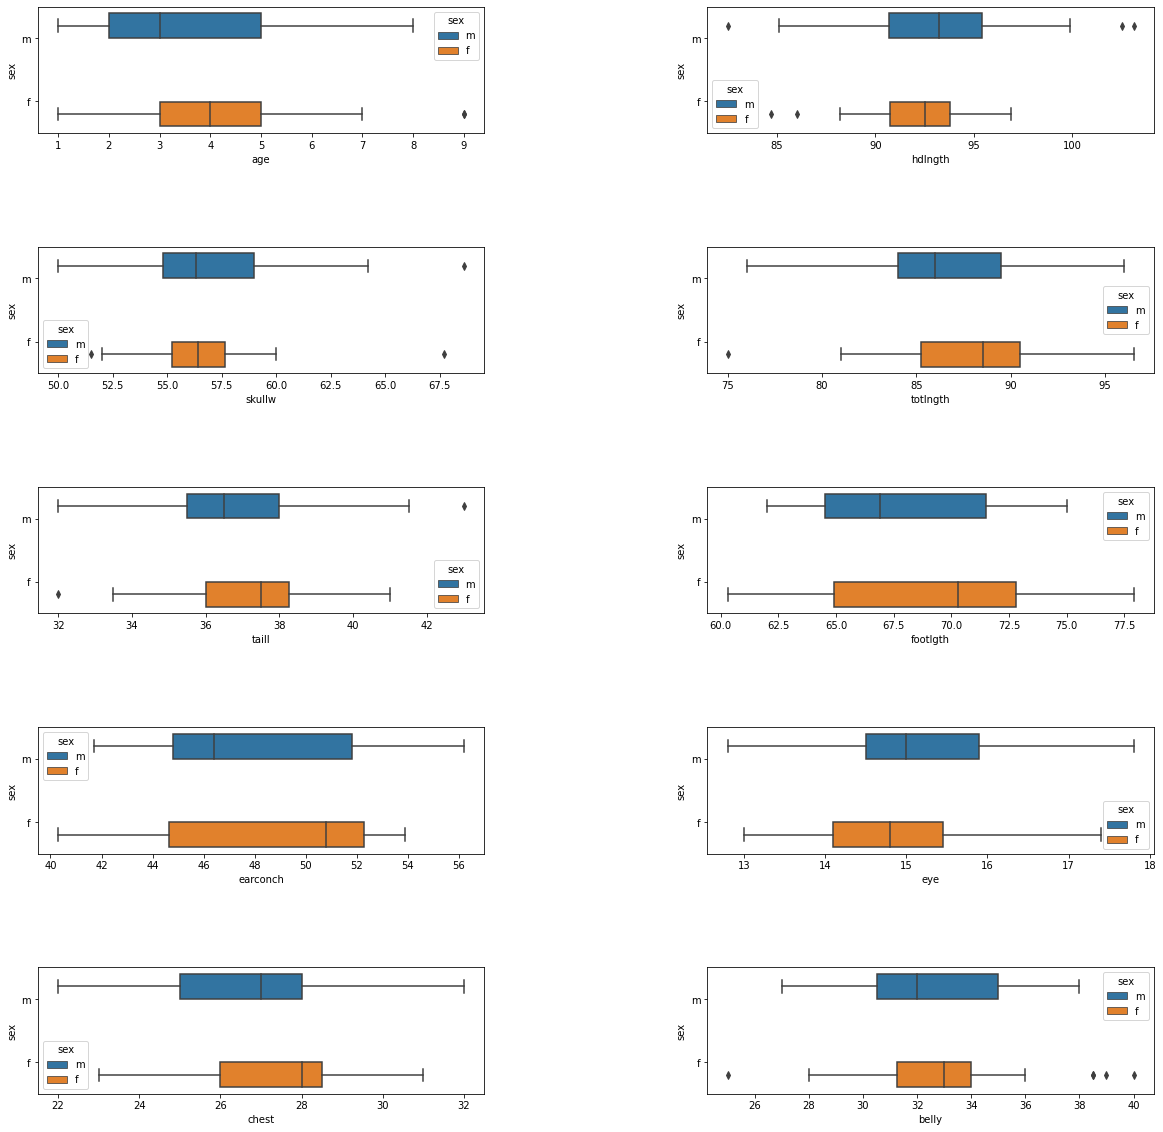

In [16]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
for i,j in enumerate(flt.columns):
                sns.boxplot(x=data[j], y=data['sex'], hue=data['sex'], ax=axes[i//2,i%2])
                #sns.histplot(x=data[j],hue=data['sex'],color='red', ax=axes[i//2,i%2])

plt.subplots_adjust(wspace=0.5,hspace=0.9)

**Boxplot findings:**
* Median head length and eye is larger in male possums
* Median total length, tail length, foot length, earconch, chest and belly is bigger in female possums 

# Categorical Data

In [17]:
#categorical columns
categorical = ["sex", 'Pop', 'site']

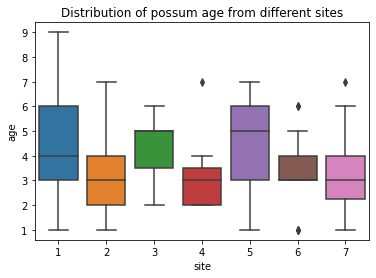

In [18]:
sns.boxplot(x="site", y="age", data=data); 
plt.title("Distribution of possum age from different sites");

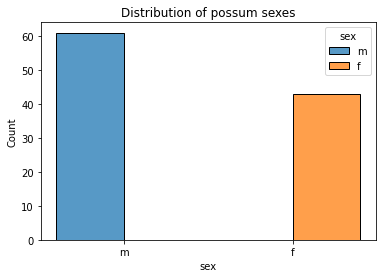

In [19]:
sns.histplot(data=data,x="sex", kde=False, hue="sex",multiple="dodge", shrink=.8)
plt.title("Distribution of possum sexes");

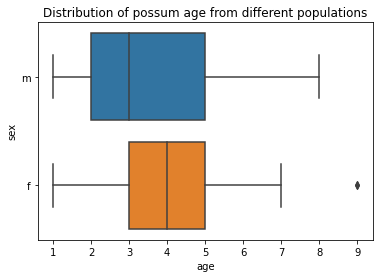

In [20]:
sns.boxplot(x = "age", y = 'sex', data = data);
plt.title("Distribution of possum age from different populations");

**Categorical data findings:**
* The entries are ~60% male
* Female possums have a higher median age than males
* Upon inspection of the columns, 'site' and 'Vic' are redundant, with sites 1 and 2 both being in Vic and the others being in other states. Therefore 'Vic' will be removed, as this information is already contained in 'site'


In [21]:
#drop repetetive column
data = data.drop('Pop', axis=1)

# Data Skewness

Skewness is a measurement of distortion of symmetrical distribution or asymmetry in data. Some regression techniques don't preform well with skewed data so we will first check how skewed each feature is

**Levels of skewness**

* < |0.5| = lowly skewed
* |1.0-0.5| = moderately skewed
* \> |1.0| = highly skewed 

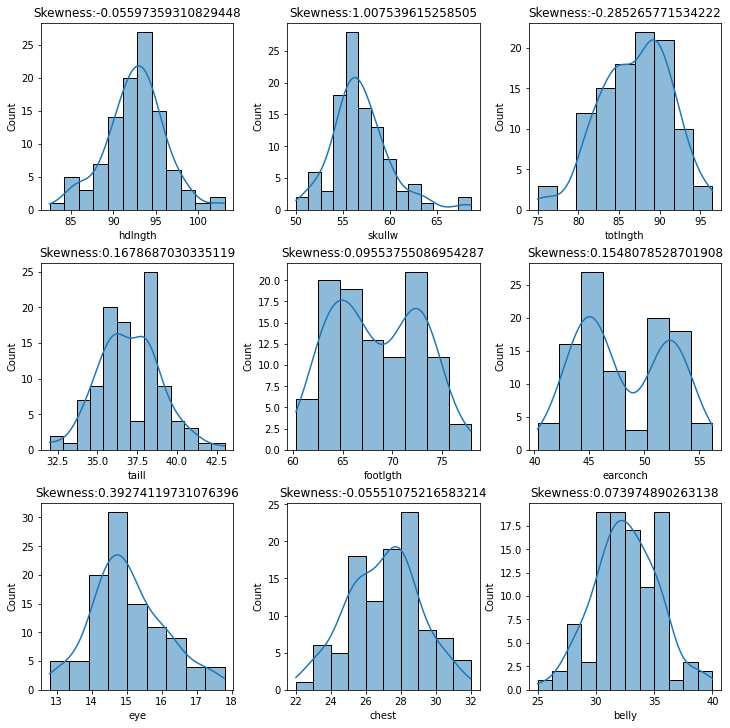

In [22]:
num = ['hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

fig,ax=plt.subplots(3,3, figsize=(10,10),constrained_layout=True)
ax=ax.ravel()

for index, col in enumerate(num):
    sns.histplot(x=col,data=data,ax=ax[index],
               kde=True)
    ax[index].set_title(f'Skewness:{data[col].skew(axis = 0)}')

As we can see, skull width is highly positively skewed.

# Dealing with Skewed Skull Width
Skull width is highly skewed, therefore it will be normalized so it doesn't interfere with ML calculations

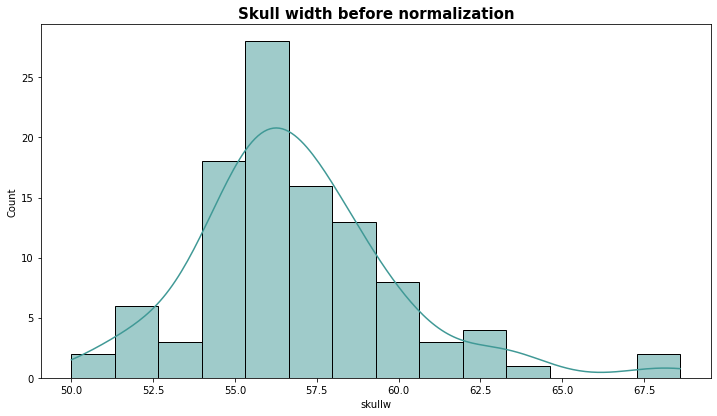

In [23]:
#skull width before normalization attribute plot
plt.figure(figsize=(12,6.5)) 
plt.title('Skull width before normalization', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
sns.histplot(data=data, x="skullw", kde=True, color='#409996')
plt.show()

In [24]:
#normalization of skull width attribute
#box-cox transformation: a way to transform power-law or non-linear distribution to normal
data['skullw'] = boxcox(x=data['skullw'])[0]

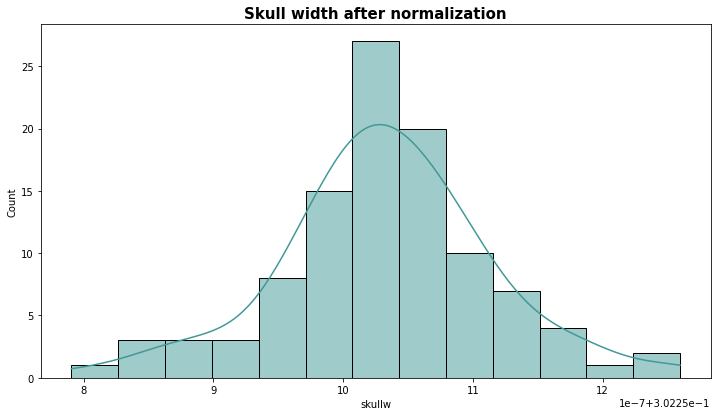

In [25]:
#normalization of skull width attribute plot
plt.figure(figsize=(12,6.5)) 
plt.title('Skull width after normalization', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
sns.histplot(data=data, x="skullw", kde=True, color='#409996')
plt.show()

Now the data has been adequately cleaned and skull width was normalized, so it can now be modeled.

# Modeling

In [26]:
#encoding categorical attributes using .get_dummies() 
data = pd.get_dummies(data = data, columns = ['sex'])
data.head()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_f,sex_m
0,1,8.0,94.1,0.302251,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,1
1,1,6.0,92.5,0.302251,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0
2,1,6.0,94.0,0.302251,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0
3,1,6.0,93.2,0.302251,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0
4,1,2.0,91.5,0.302251,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0


In [27]:
#drop both sex columns from X and assign to y
X = data.drop(['sex_f', 'sex_m'], axis=1)
y= data['sex_f']

In [28]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
y_train.head()

90    0
71    0
53    0
27    0
18    1
Name: sex_f, dtype: uint8

In [30]:
#scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
#Logistic Regression of unscaled data
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [32]:
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))

lr_acc = accuracy_score(y_test,lr_pred)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.69      0.69      0.69        13

    accuracy                           0.75        32
   macro avg       0.74      0.74      0.74        32
weighted avg       0.75      0.75      0.75        32



[[15  4]
 [ 4  9]]


In [33]:
#Logistic Regression of scaled data
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [34]:
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))

lr_acc = accuracy_score(y_test,lr_pred)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.67      0.62      0.64        13

    accuracy                           0.72        32
   macro avg       0.71      0.70      0.70        32
weighted avg       0.72      0.72      0.72        32



[[15  4]
 [ 5  8]]


In [35]:
#Decision Tree of unscaled data
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

In [36]:
print(classification_report(y_test,dtc_pred))
print('\n')
print(confusion_matrix(y_test,dtc_pred))

dtc_acc = accuracy_score(y_test,dtc_pred)

              precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.53      0.69      0.60        13

    accuracy                           0.62        32
   macro avg       0.63      0.64      0.62        32
weighted avg       0.65      0.62      0.63        32



[[11  8]
 [ 4  9]]


In [37]:
#Decision Tree of scaled data
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)

In [38]:
print(classification_report(y_test,dtc_pred))
print('\n')
print(confusion_matrix(y_test,dtc_pred))

dtc_acc = accuracy_score(y_test,dtc_pred)

              precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.47      0.69      0.56        13

    accuracy                           0.56        32
   macro avg       0.58      0.58      0.56        32
weighted avg       0.60      0.56      0.56        32



[[ 9 10]
 [ 4  9]]


In [39]:
#Random Forest of unscaled data
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [40]:
print(classification_report(y_test,rf_pred))
print('\n')
print(confusion_matrix(y_test,rf_pred))

rf_acc = accuracy_score(y_test,rf_pred)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.64      0.69      0.67        13

    accuracy                           0.72        32
   macro avg       0.71      0.71      0.71        32
weighted avg       0.72      0.72      0.72        32



[[14  5]
 [ 4  9]]


In [41]:
#Random Forest of scaled data
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)

In [42]:
print(classification_report(y_test,rf_pred))
print('\n')
print(confusion_matrix(y_test,rf_pred))

rf_acc = accuracy_score(y_test,rf_pred)

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.50      0.46      0.48        13

    accuracy                           0.59        32
   macro avg       0.57      0.57      0.57        32
weighted avg       0.59      0.59      0.59        32



[[13  6]
 [ 7  6]]


In [43]:
#K Nearest Neighbors of unscaled data
knc = KNeighborsClassifier(2)
knc.fit(X_train,y_train)
knc_pred = knc.predict(X_test)

In [44]:
print(classification_report(y_test,knc_pred))
print('\n')
print(confusion_matrix(y_test,knc_pred))

knc_acc = accuracy_score(y_test,knc_pred)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.67      0.46      0.55        13

    accuracy                           0.69        32
   macro avg       0.68      0.65      0.65        32
weighted avg       0.68      0.69      0.67        32



[[16  3]
 [ 7  6]]


In [45]:
#K Nearest Neighbors of scaled data
knc = KNeighborsClassifier(2)
knc.fit(X_train_scaled,y_train)
knc_pred = knc.predict(X_test_scaled)

In [46]:
print(classification_report(y_test,knc_pred))
print('\n')
print(confusion_matrix(y_test,knc_pred))

knc_acc = accuracy_score(y_test,knc_pred)

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        19
           1       0.50      0.38      0.43        13

    accuracy                           0.59        32
   macro avg       0.57      0.56      0.56        32
weighted avg       0.58      0.59      0.58        32



[[14  5]
 [ 8  5]]


In [47]:
#XGBoost of unscaled data
xgc = XGBClassifier()
xgc.fit(X_train,y_train)
xgc_pred = xgc.predict(X_test)

In [48]:
print(classification_report(y_test,xgc_pred))
print('\n')
print(confusion_matrix(y_test,xgc_pred))

xgc_acc = accuracy_score(y_test,xgc_pred)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.64      0.69      0.67        13

    accuracy                           0.72        32
   macro avg       0.71      0.71      0.71        32
weighted avg       0.72      0.72      0.72        32



[[14  5]
 [ 4  9]]


In [49]:
#XGBoost of scaled data
xgc = XGBClassifier()
xgc.fit(X_train_scaled,y_train)
xgc_pred = xgc.predict(X_test_scaled)

In [50]:
print(classification_report(y_test,xgc_pred))
print('\n')
print(confusion_matrix(y_test,xgc_pred))

xgc_acc = accuracy_score(y_test,xgc_pred)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.54      0.54      0.54        13

    accuracy                           0.62        32
   macro avg       0.61      0.61      0.61        32
weighted avg       0.62      0.62      0.62        32



[[13  6]
 [ 6  7]]


# Conclusions:
* The sex of possums was predicted using LogisticRegression, DecisionTree, RandomForest, K Nearest Neighbors and XGBoost
* Unscaled data actually preformed better than scaled data (except for DecisionTree where both were the same)
* LogisticRegression and Random Forest (of unscaled data) preformed the best of all models when considering presicion, recall and f1-score in combination (all three values are 0.79 for each)
* Relatively low precision and recall scores can likely be attributed at least in part due to the fact that the dataset contains only 104 entries. Before focusing on improving ML calculations, it is pertinent to obtain more data